# Plain Python implementation of K-Means

K-Means is a very simple clustering algorithm (clustering belongs to unsupervised learning). Given a fixed number of clusters and an input dataset the algorithm tries to partition the data into clusters such that the clusters have high intra-class similarity and low inter-class similarity. 

### Algorithm

1. Initialize the cluster centers, either randomly within the range of the input data or (recommended) to some of the existing training examples

2. Until convergence  

   2.1. Assign each datapoint to the closest cluster. The distance between a point and cluster center is measured using the Euclidean distance.  

   2.2. Update the current estimates of the cluster centers by setting them to the mean of all instance belonging to that cluster  
   
   
### Objective function

The underlying objective function tries to find cluster centers such that, if the data are partitioned into the corresponding clusters, distances between data points and their closest cluster centers become as small as possible.

Given a set of datapoints ${x_1, ..., x_n}$ and a positive number $k$, find the clusters $C_1, ..., C_k$ that minimize

\begin{equation}
J = \sum_{i=1}^n \, \sum_{j=1}^k \, z_{ij} \, || x_i - \mu_j ||_2
\end{equation}

where:  
- $z_{ij} \in \{0,1\}$ defines whether of not datapoint $x_i$ belongs to cluster $C_j$
- $\mu_j$ denotes the cluster center of cluster $C_j$
- $|| \, ||_2$ denotes the Euclidean distance

### Disadvantages 
- The number of clusters has to be set in the beginning
- The results depend on the inital cluster centers
- It's sensitive to outliers
- It's not suitable for finding non-convex clusters
- It's not guaranteed to find a global optimum, so it can get stuck in a local minimum
- ...

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
plt.rcParams['image.cmap'] = 'viridis'

% matplotlib inline

In [3]:
X, y = make_blobs(centers=k, n_samples=1000)
print('Shape of dataset: ', X.shape)

Shape of dataset:  (1000, 2)


In [54]:
class KMeans():
    def __init__(self, n_clusters=4):
        self.k = n_clusters

    def fit(self, data):
        # print('data: ', data)
        # print()
        n_samples, _ = data.shape
        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)
        # print('self.centers: ', self.centers)
        # print()
        old_assigns = None
        n_iters = 0

        while True:
            # loop through all data points and classify them
            new_assigns = [self.classify(datapoint) for datapoint in data]

            if new_assigns == old_assigns:
                print("Training finished after {} iterations!".format(n_iters))
                return

            old_assigns = new_assigns
            n_iters += 1

            # recalculate centers
            for id_ in range(self.k):
                points_idx = np.where(np.array(new_assigns) == id_)
                datapoints = data[points_idx]
                self.centers[id_] = datapoints.mean(axis=0)


    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists

    def classify(self, data):
        # return index of the cluster closest to the datapoint
        dists = self.l2_distance(data)
        return np.argmin(dists)

    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k')
        plt.show()

In [55]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Training finished after 7 iterations!


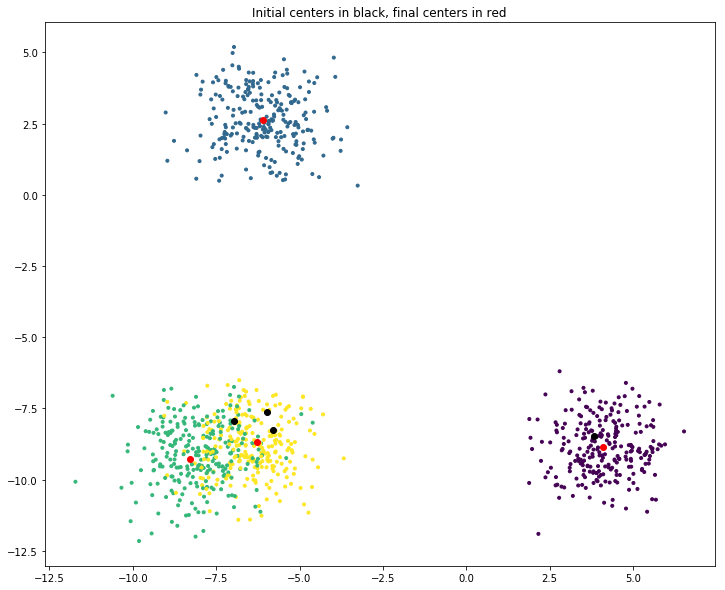

In [56]:
kmeans.plot_clusters(X)